# **Handwritten Digit Classification using Neural Networks and Tensorflow**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

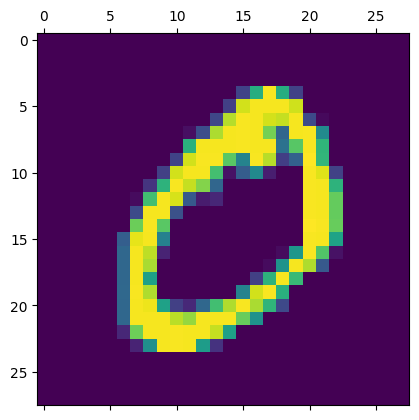

In [16]:
plt.matshow(X_train[1])

In [15]:
y_train[1]

0

In [8]:
# Scaling
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

In [37]:
#Creating Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1244 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0523 - accuracy: 0.9842


In [38]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([5.5952184e-03, 5.8885623e-04, 9.8829135e-02, 7.9987133e-01,
       9.6884811e-05, 2.2610626e-03, 1.6709006e-05, 9.9997097e-01,
       2.7120147e-02, 4.7625337e-02], dtype=float32)

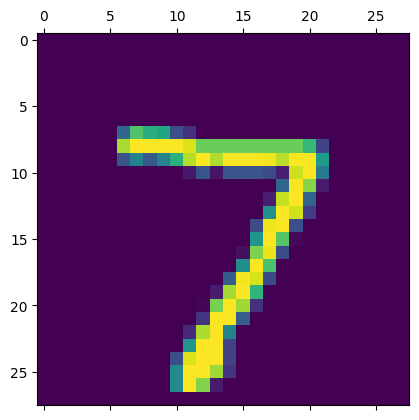

In [39]:
plt.matshow(X_test[0])

In [40]:
np.argmax(y_predicted[0])

7

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
#Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    1,    1,    1,    0,    0,    1,    2,    0],
       [   0, 1124,    4,    1,    0,    1,    2,    0,    3,    0],
       [   8,    0, 1005,    4,    1,    0,    2,    4,    8,    0],
       [   1,    0,    2,  988,    1,    0,    0,    6,    5,    7],
       [   1,    0,    3,    1,  952,    1,    4,    2,    2,   16],
       [   3,    0,    0,   17,    2,  851,    4,    1,   10,    4],
       [  14,    3,    3,    1,    3,    4,  924,    1,    5,    0],
       [   1,    2,    8,    2,    0,    1,    0, 1004,    2,    8],
       [   8,    0,    4,    5,    3,    1,    1,    5,  942,    5],
       [   3,    3,    0,    5,    4,    1,    0,    8,    1,  984]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

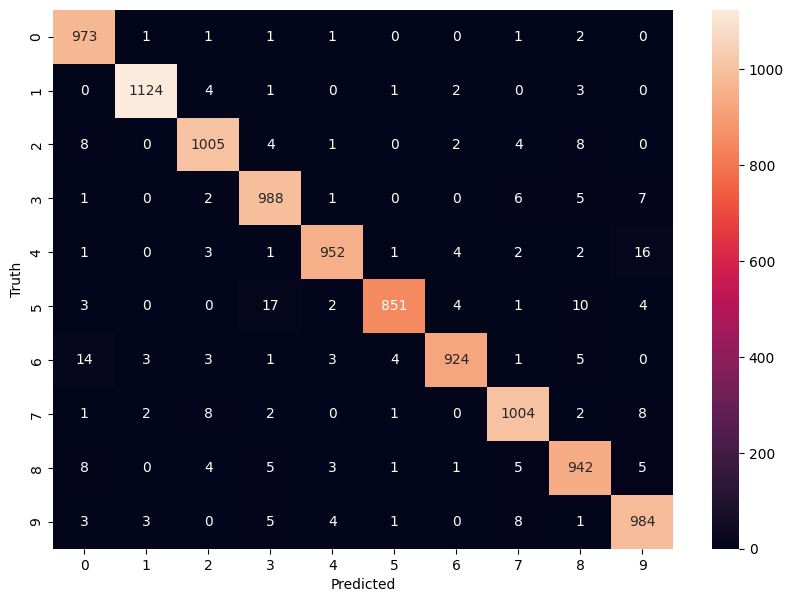

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')